<a href="https://colab.research.google.com/github/popelucha/digital-humanities/blob/main/DH_5__Text_Analysis_Continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analysis (cont'd)
The aim of the notebook is to begin with quantitative analysis of text data. We select a Czech text, split it into tokens, perform frequency analysis, and observe the nature of the data.

In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!wget https://nlp.fi.muni.cz/~xpopelk/maj.txt

--2024-10-24 07:16:25--  https://nlp.fi.muni.cz/~xpopelk/maj.txt
Resolving nlp.fi.muni.cz (nlp.fi.muni.cz)... 147.251.51.11
Connecting to nlp.fi.muni.cz (nlp.fi.muni.cz)|147.251.51.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29777 (29K) [text/plain]
Saving to: ‘maj.txt’

maj.txt             100%[===================>]  29.08K  --.-KB/s    in 0.1s    

2024-10-24 07:16:25 (268 KB/s) - ‘maj.txt’ saved [29777/29777]



In [ ]:
text = None
with open('maj.txt') as f:  # modify the path if needed
    text = f.read()

In [ ]:
import requests
import json

In [ ]:
data = {"call": "tagger",
        "lang": "cs",
        "output": "json",
        "text": text.replace(';', ',')
       }
uri = "https://nlp.fi.muni.cz/languageservices/service.py"
r = requests.post(uri, data=data)
r

<Response [200]>

In [ ]:
if r.status_code!=200:
    print(r.content)

In [ ]:
data = r.json()
data

{'vertical': [['<s>'],
  ['1', '#num#', 'k4'],
  ['Byl', 'být', 'k5eAaImAgInS'],
  ['pozdní', 'pozdní', 'k2eAgInSc1d1'],
  ['večer', 'večer', 'k1gInSc1'],
  ['–', '–', 'k?'],
  ['první', 'první', 'k4xOgInSc4'],
  ['máj', 'máj', 'k1gFnSc4'],
  ['–', '–', 'k?'],
  ['večerní', 'večerní', 'k2eAgInSc4d1'],
  ['máj', 'máj', 'k1gFnSc1'],
  ['–', '–', 'k?'],
  ['byl', 'být', 'k5eAaImAgInS'],
  ['lásky', 'láska', 'k1gFnSc2'],
  ['čas', 'čas', 'k1gInSc1'],
  ['<g/>'],
  ['.', '.', 'kIx.'],
  ['</s>'],
  ['<s desamb="1">'],
  ['Hrdliččin', 'hrdliččin', 'k2eAgInSc1d1'],
  ['zval', 'zvát', 'k5eAaImAgInS'],
  ['ku', 'k', 'k7c3'],
  ['lásce', 'láska', 'k1gFnSc3'],
  ['hlas', 'hlas', 'k1gInSc1'],
  ['<g/>'],
  [',', ',', 'kIx,'],
  ['kde', 'kde', 'k6eAd1'],
  ['borový', 'borový', 'k2eAgMnSc1d1'],
  ['zaváněl', 'zavánět', 'k5eAaImAgInS'],
  ['háj', 'háj', 'k1gInSc1'],
  ['<g/>'],
  ['.', '.', 'kIx.'],
  ['</s>'],
  ['<s desamb="1">'],
  ['O', 'o', 'k7c6'],
  ['lásce', 'láska', 'k1gFnSc6'],
  ['šeptal',

In [ ]:
tokens = [token for token in data['vertical'] if len(token)==3]
df = pd.DataFrame.from_dict({"word": [word for word, lemma, tag in tokens],
                              "lemma": [lemma for word, lemma, tag in tokens],
                              "tag": [tag for word, lemma, tag in tokens]
                               })
pd.options.display.max_rows = len(df)
df

word          lemma                                     tag
0                 1          #num#                                      k4
1               Byl            být                            k5eAaImAgInS
2            pozdní         pozdní                            k2eAgInSc1d1
3             večer          večer                                k1gInSc1
4                 –              –                                      k?
5             první          první                              k4xOgInSc4
6               máj            máj                                k1gFnSc4
7                 –              –                                      k?
8           večerní        večerní                            k2eAgInSc4d1
9               máj            máj                                k1gFnSc1
10                –              –                                      k?
11              byl            být                            k5eAaImAgInS
12            lásky          láska                                k1gFnSc2
13              čas            čas                                k1gInSc1
14                .              .                                    kIx.
15        Hrdliččin      hrdliččin                            k2eAgInSc1d1
16             zval           zvát                            k5eAaImAgInS
17               ku              k                                    k7c3
18            lásce          láska                                k1gFnSc3
19             hlas           hlas                                k1gInSc1
20                ,              ,                                    kIx,
21              kde            kde                                  k6eAd1
22           borový         borový                            k2eAgMnSc1d1
23          zaváněl        zavánět                            k5eAaImAgInS
24              háj            háj                                k1gInSc1
25                .              .                                    kIx.
26                O              o                                    k7c6
27            lásce          láska                                k1gFnSc6
28           šeptal         šeptat                            k5eAaImAgInS
29            tichý          tichý                            k2eAgInSc1d1
30             mech           mech                                k1gInSc1
31                ,              ,                                    kIx,
32         květoucí       květoucí                            k2eAgInSc1d1
33            strom          strom                                k1gInSc1
34             lhal           lhát                            k5eAaImAgInS
35            lásky          láska                                k1gFnPc4
36              žel          želet                            k5eAaImRp2nS
37                ,              ,                                    kIx,
38             svou           svůj                            k3xOyFgFnSc4
39            lásku          láska                                k1gFnSc4
40           slavík         slavík                                k1gMnSc1
41             růži           růže                                k1gFnSc4
42              pěl            pět                            k5eAaImAgMnS
43                ,              ,                                    kIx,
44           růžinu         růžina                                k1gFnSc4
45            jevil          jevit                            k5eAaImAgInS
46            vonný          vonný                            k2eAgInSc1d1
47           vzdech         vzdech                                k1gInSc1
48                .              .                                    kIx.
49           Jezero         jezero                                k1gNnSc1
50           hladké         hladký                            k2eAgNnSc1d1
51                v              v                                    k7c6
52          křovích          křoev      

In [ ]:
pos = [tag[0:2] for tag in df["tag"]]
df["pos"] = pos
df

word          lemma                                     tag pos
0                 1          #num#                                      k4  k4
1               Byl            být                            k5eAaImAgInS  k5
2            pozdní         pozdní                            k2eAgInSc1d1  k2
3             večer          večer                                k1gInSc1  k1
4                 –              –                                      k?  k?
5             první          první                              k4xOgInSc4  k4
6               máj            máj                                k1gFnSc4  k1
7                 –              –                                      k?  k?
8           večerní        večerní                            k2eAgInSc4d1  k2
9               máj            máj                                k1gFnSc1  k1
10                –              –                                      k?  k?
11              byl            být                            k5eAaImAgInS  k5
12            lásky          láska                                k1gFnSc2  k1
13              čas            čas                                k1gInSc1  k1
14                .              .                                    kIx.  kI
15        Hrdliččin      hrdliččin                            k2eAgInSc1d1  k2
16             zval           zvát                            k5eAaImAgInS  k5
17               ku              k                                    k7c3  k7
18            lásce          láska                                k1gFnSc3  k1
19             hlas           hlas                                k1gInSc1  k1
20                ,              ,                                    kIx,  kI
21              kde            kde                                  k6eAd1  k6
22           borový         borový                            k2eAgMnSc1d1  k2
23          zaváněl        zavánět                            k5eAaImAgInS  k5
24              háj            háj                                k1gInSc1  k1
25                .              .                                    kIx.  kI
26                O              o                                    k7c6  k7
27            lásce          láska                                k1gFnSc6  k1
28           šeptal         šeptat                            k5eAaImAgInS  k5
29            tichý          tichý                            k2eAgInSc1d1  k2
30             mech           mech                                k1gInSc1  k1
31                ,              ,                                    kIx,  kI
32         květoucí       květoucí                            k2eAgInSc1d1  k2
33            strom          strom                                k1gInSc1  k1
34             lhal           lhát                            k5eAaImAgInS  k5
35            lásky          láska                                k1gFnPc4  k1
36              žel          želet                            k5eAaImRp2nS  k5
37                ,              ,                                    kIx,  kI
38             svou           svůj                            k3xOyFgFnSc4  k3
39            lásku          láska                                k1gFnSc4  k1
40           slavík         slavík                                k1gMnSc1  k1
41             růži           růže                                k1gFnSc4  k1
42              pěl            pět                            k5eAaImAgMnS  k5
43                ,              ,                                    kIx,  kI
44           růžinu         růžina                                k1gFnSc4  k1
45            jevil          jevit                            k5eAaImAgInS  k5
46            vonný          vonný                            k2eAgInSc1d1  k2
47           vzdech         vzdech                                k1gInSc1  k1
48                .              .                                    kIx.  kI
49           Jezero         jezero                               

In [ ]:
nouns = df[df["pos"]=="k1"]
verbs = df[df["pos"]=="k5"]
cn = nouns.groupby(by="lemma").count()
noun_lemmata = pd.DataFrame({"count":cn["word"]})
vn = verbs.groupby(by="lemma").count()
verb_lemmata = pd.DataFrame({"count":vn["word"]})

noun_lemmata.sort_values("count", ascending=False)

count
lemma               
hora              34
čas               31
hlas              31
jezero            29
kolo              28
vězeň             27
láska             25
noc               23
tvář              22
den               20
stín              19
zrak              17
les               17
voda              17
máj               16
sen               16
slza              16
břeh              14
klín              14
myšlenka          14
dálka             13
zář               13
lebka             12
pahorek           12
skála             11
hvězda            11
hluk              11
měsíc             11
vítr              11
lůno              10
sbor              10
nebe              10
mrak              10
město              9
můj                9
zem                9
pán                9
hrob               9
ticho              9
srdce              9
země               8
zločinec           8
dol                8
věk                8
krajina            8
konec              8
svět               8
duch               7
cit                7
běh                7
hlava              7
vůdce              7
slunce             7
Jarmila            7
kraj               7
Vilém              7
oko                7
jiskra             7
kapka              6
léto               6
život              6
dívka              6
zpěv               6
krok               6
stán               6
hrůza              6
květ               6
vlna               6
sloup              6
světlo             6
zvuk               6
strom              6
modro              6
ucho               5
množství           5
moc                5
půlnoc             5
kůl                5
večer              5
pták               5
dvůr               5
slovo              5
ruka               5
blíž               5
otec               5
vina               5
ilustrace          5
temno              5
kůň                4
strážný            4
mlha               4
strážce            4
lampa              4
pád                4
šepot              4
zvon               4
stůl               4
vichr              4
síň                4
věž                4
pláč               4
plášť              4
krev               4
hřmot              4
háj                4
milenka            4
svit               4
oud                4
svůdce             4
příkrov            4
dub                4
řetěz              4
hloub              4
pohřeb             4
svita              4
požár              4
mračno             4
matka              4
věčnost            3
mal                3
rok                3
krása              3
růž                3
meč                3
lílie              3
pouť               3
vzdech             3
šepce              3
líc                3
sova               3
vrch               3
střed              3
svůj               3
vlnka              3
lid                3
rosa               3
věnec              3
žal                3
člůnek             3
růže               3
duše               3
smutek             3
bor                3
hudba              3
obraz              3
hra                3
tvor               3
byt                3
cíl                3
pruh               3
hluboko            3
skok               3
pola               3
brána              3
tvůj               3
bílé               3
zástup             3
jasno              3
kmit               3
rakev              3
kostlivec          3
pluk               3
plavec             3
kobka              3
trouba             3
tíš                3
blíže              3
kletba             3
kaple              3
jméno              3
tma                3
chvíle             3
mrtvý              2
muka               2
muška              2
mrákota            2
temnota            2
pole               2
tón                2
příroda            2
pot                2
nebesa             2
neskončenost       2
suchopar           2
ptactvo            2
poutník            2
obličej            2
syn                2
tělo               2
poms

In [ ]:
verb_lemmata.sort_values("count", ascending=False)

count
lemma              
být              65
stát             16
mít              11
zhynout           9
dát               9
kolit             8
hynout            8
zvát              7
jít               7
hrát              7
umírat            7
znět              6
plynout           6
vinout            5
míhat             5
sedět             5
zdvíhat           5
vést              4
umlknout          4
měřit             4
objímat           4
připravit         4
splynout          4
spěchat           4
stíhat            4
svítit            4
spát              4
vstát             4
zajít             3
přikrýt           3
zřít              3
zírat             3
vzplanout         3
změnit            3
obdržet           3
vzejít            3
opírat            3
zjevit            3
přijít            3
zdát              3
kráčet            3
vzbudit           3
vyvést            3
sklesnout         3
slyšet            3
vábit             3
vědět             3
zalétat           3
zahalit           3
svít              3
utichnout         3
žít               3
hledět            3
dřímat            3
jestitit          3
jevit             3
bloudit           3
klonit            3
stopit            2
taktit            2
hlubokotit        2
střídat           2
táhnout           2
truchlet          2
tvořit            2
uhlídat           2
dívat             2
upírat            2
spočívat          2
houpat            2
smát              2
dít               2
skvít             2
skončit           2
hořet             2
růst              2
rozestírat        2
rojit             2
přivanout         2
přimrazit         2
přikrývat         2
přelétat          2
překonávat        2
pět               2
usnout            2
uvést             2
prosvítat         2
vidět             2
želet             2
šeptat            2
šepotat           2
řinčet            2
činit             2
zívat             2
blysknout         2
zvučet            2
blížit            2
znít              2
broubit           2
zmizet            2
budit             2
zhlížet           2
bít               2
běžet             2
zavánět           2
zavraždit         2
zakvítat          2
zajmout           2
zabírat           2
vyvstat           2
vyhasnout         2
vycházet          2
vstoupit          2
vrátit            2
vlastit           2
psát              2
barvit            2
plát              2
jíst              2
minout            2
nést              2
omdlívat          2
klesnout          2
odpravit          2
nastávat          2
pohynout          2
ležet             2
lhát              2
letět             2
mísit             2
obnažit           2
padat             2
opět              2
obrátit           2
nastat            2
nazývat           1
vyhnat            1
vyjít             1
vyniknout         1
vyrýt             1
dovést            1
vystoupit         1
poletět           1
vyvábit           1
dosáhnout         1
dostihnout        1
vzdálit           1
vzdát             1
doslechnout       1
vzmahat           1
doručit           1
vzít              1
doprovázet        1
vát               1
dopadnout         1
vzdechnout        1
ničit             1
nechat            1
vstoupat          1
uspávat           1
ustoupit          1
jímat             1
utírat            1
uvadnout          1
uvádět            1
uvít              1
uzřít             1
valit             1
vdechnout         1
vedšet            1
veselit           1
nížit             1
dozvědět          1
vloudit           1
vložit            1
vlát              1
vodit             1
volat             1
volit             1
vplést            1
vížat             1
vrýt              1
vítat             1
nalézt            1
donést            1
líbat             1
modlit            1
bydlit            1
mlčet             1
zkalit            1
mluvit            1
zmlknout          1
znát              1
mihnout           1
lít               1
ztichnout         1
ztrestat          1
zvučit            1
zemřít        

In [ ]:
person1 = df[df["tag"].str.contains("p1")]
person1

word     lemma                            tag pos
652         mi        já                     k3xPp1nSc3  k3
674        můj       můj                   k3xOp1gMnSc1  k3
809        mou       můj                   k3xOp1gFnSc4  k3
1094       mou       můj                   k3xOp1gFnSc4  k3
1100        mě        já                     k3xPp1nSc4  k3
1108        mě        já                     k3xPp1nSc4  k3
1117       mně        já                     k3xPp1nSc6  k3
1128        já        já                     k3xPp1nSc1  k3
1130      jsem       být                   k5eAaImIp1nS  k5
1138       můj       můj                   k3xOp1gInSc4  k3
1381       můj       můj                   k3xOp1gInSc1  k3
1391      mojí       můj                   k3xOp1gFnSc2  k3
1395       mně        já                     k3xPp1nSc6  k3
1410      jsem       být                   k5eAaImIp1nS  k5
1424      nesu      nést                   k5eAaImIp1nS  k5
1435      jsem       být                   k5eAaImIp1nS  k5
1436        já        já                     k3xPp1nSc1  k3
1441      bych        by                       kYmCp1nS  kY
1448      jsem       být                   k5eAaImIp1nS  k5
1460      hynu    hynout                   k5eAaImIp1nS  k5
1512      jsem       být                   k5eAaImIp1nS  k5
1518       můj       můj                   k3xOp1gMnSc1  k3
1525        Má       můj                   k3xOp1gFnSc1  k3
1616       můj       můj                   k3xOp1gInSc1  k3
1741        mé       můj                   k3xOp1gFnSc2  k3
1819      žiji       žít                   k5eAaImIp1nS  k5
1837      jsem       být                   k5eAaImIp1nS  k5
1847        mi        já                     k3xPp1nSc3  k3
1929       mně        já                     k3xPp1nSc6  k3
2001       mně        já                     k3xPp1nSc6  k3
2116       mne        já                     k3xPp1nSc4  k3
2125      mnou        já                     k3xPp1nSc7  k3
2129       mne        já                     k3xPp1nSc2  k3
2132      mnou        já                     k3xPp1nSc7  k3
2183      jsem       být                   k5eAaImIp1nS  k5
2374     ničím     ničit                   k5eAaImIp1nS  k5
2790       nás        my                     k3xPp1nPc4  k3
2816      námi        my                     k3xPp1nPc7  k3
2819       nám        my                     k3xPp1nPc3  k3
2859       můj       můj                   k3xOp1gInSc4  k3
2864       Můj       můj                   k3xOp1gInSc1  k3
2884       nás        my                     k3xPp1nPc4  k3
2910       nás        my                     k3xPp1nPc4  k3
2928       můj       můj                   k3xOp1gInSc1  k3
2943        mi        já                     k3xPp1nSc3  k3
2953      budu       být                   k5eAaImBp1nS  k5
2954        já        já                     k3xPp1nSc1  k3
2961        My        my                     k3xPp1nPc1  k3
2962   odbudem     odbýt                 k5eAaPmIp1nPwH  k5
2981        Já        já                     k3xPp1nSc1  k3
2985       dám       dát                   k5eAaPmIp1nS  k5
2992        Já        já                     k3xPp1nSc1  k3
2994  obstarám  obstarat                   k5eAaPmIp1nS  k5
2999        Já        já                     k3xPp1nSc1  k3
3002   doručím   doručit                   k5eAaPmIp1nS  k5
3014       nám        my                     k3xPp1nPc3  k3
3021        já        já                     k3xPp1nSc1  k3
3024  zapůjčím  zapůjčit                   k5eAaPmIp1nS  k5
3030        já        já                     k3xPp1nSc1  k3
3031   rozduji   rozdout                   k5eAaPmIp1nS  k5
3039        Já        já                     k3xPp1nSc1  k3
3042  pokropím  pokropit                   k5eAaPmIp1nS  k5
3048        Já        já                     k3xPp1nSc1  k3
3052     uviji      uvít                   k5eAaPmIp1nS  k5
3058        My        my                     k3xPp1nPc1  k3
3062   donesem    donést                 k5eAaPmIp

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: >

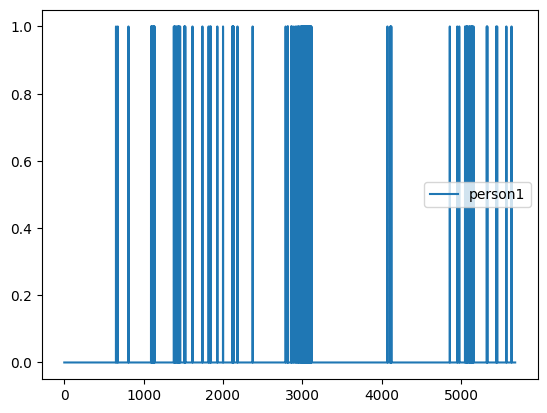

In [ ]:
vis = pd.DataFrame({'word':df['word'], 'person1':[1 if i in person1.index else 0 for i in range(len(df))]})
vis
vis.plot()

<ipython-input-13-64b573000891>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vis = vis.groupby(bins)['person1'].agg(['sum'])


<Axes: >

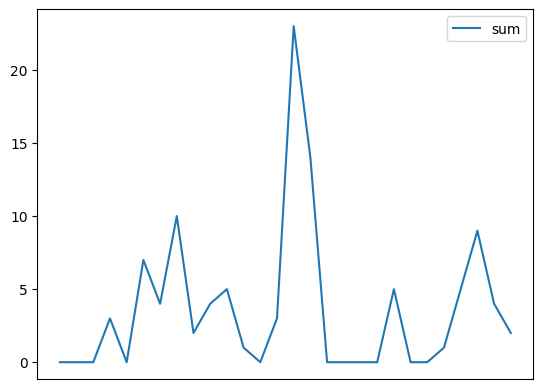

In [ ]:
group = 200
bins = pd.cut(df.index, int(len(df)/group))
vis = pd.DataFrame({'lemma':df['lemma'], 'person1':[1 if i in person1.index else 0 for i in range(len(df))]})
vis = vis.groupby(bins)['person1'].agg(['sum'])
vis
vis.plot(xticks=([]))

<Axes: >

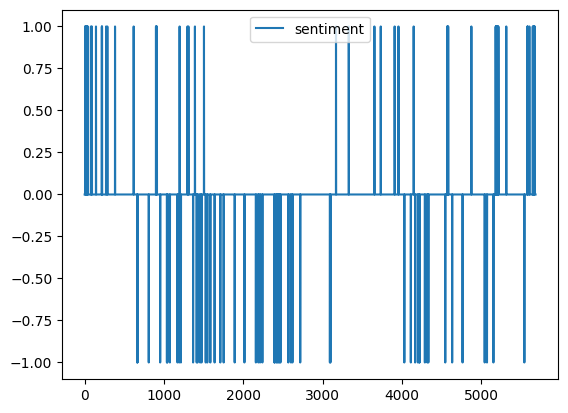

In [ ]:
sentiment_negative = df[(df["lemma"].str.contains("vězeň"))|(df["lemma"].str.contains("smrt"))|(df["lemma"].str.contains("hrob"))|(df["lemma"].str.contains("hrůza"))|(df["lemma"].str.contains("kletba"))|(df["lemma"].str.contains("kostlivec"))|(df["lemma"].str.contains("krev"))]
sentiment_positive = df[(df["lemma"].str.contains("láska"))|(df["lemma"].str.contains("anjel"))|(df["lemma"].str.contains("dívka"))|(df["lemma"].str.contains("máj"))|(df["lemma"].str.contains("lučina"))|(df["lemma"].str.contains("mladost"))|(df["lemma"].str.contains("příroda"))]
vis = pd.DataFrame({'word':df['word'], 'sentiment':[-1 if i in sentiment_negative.index else (1 if i in sentiment_positive.index else 0) for i in range(len(df))]})
vis
vis.plot()

<Axes: >

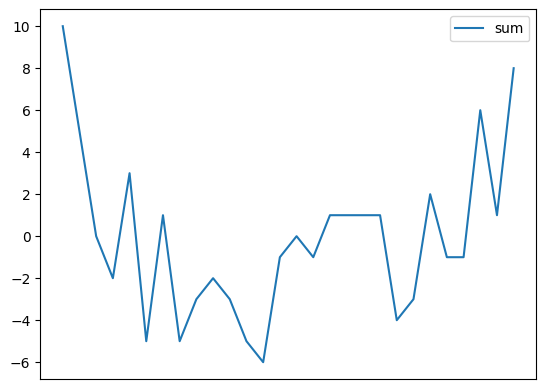

In [ ]:
group = 200
bins = pd.cut(df.index, int(len(df)/group))
vis = pd.DataFrame({'lemma':df['lemma'], 'sentiment':[-1 if i in sentiment_negative.index else (1 if i in sentiment_positive.index else 0) for i in range(len(df))]})
vis = vis.groupby(bins)['sentiment'].agg(['sum'])
vis
vis.plot(xticks=([]))

In [ ]:
print("substantives",set(df[df['tag'].str.contains('k1')]['lemma'].values))

substantives {'suchopar', 'růž', 'lidstvo', 'vězeň', 'ňádra', 'sen', 'bouře', 'zrak', 'ostatní', 'dívka', 'hemžení', 'doba', 'pes', 'týl', 'peruť', 'mlado', 'křížek', 'trouba', 'slovo', 'modro', 'vrch', 'modlitba', 'žalm', 'výtí', 'člůnek', 'křik', 'dětinství', 'větřík', 'list', 'spaní', 'navzda', 'hřmot', 'hana', 'pověst', 'chrám', 'rod', 'střed', 'rakev', 'věnec', 'hvězda', 'lid', 'okno', 'strach', 'krása', 'Jarmila', 'hluboko', 'klín', 'mrákota', 'zdání', 'plášť', 'kmit', 'jar', 'kola', 'pomsta', 'šero', 'soucit', 'prsa', 'svita', 'rosa', 'tvůj', 'věčnost', 'snění', 'věk', 'tón', 'myšlenka', 'zem', 'žití', 'matka', 'žal', 'místo', 'dav', 'venek', 'zástup', 'rouška', 'zenit', 'oko', 'zjev', 'městečko', 'běda', 'smrt', 'růžina', 'pláč', 'děva', 'skok', 'obláčka', 'květ', 'stesk', 'byt', 'pán', 'bludice', 'zemřelý', 'slavík', 'padlý', 'malé', 'příkrov', 'krk', 'nebe', 'příroda', 'stezka', 'loďka', 'uste', 'paměť', 'dítko', 'jaro', 'otec', 'sbor', 'věž', 'šepotání', 'les', 'pryč', 'obzo

<Axes: >

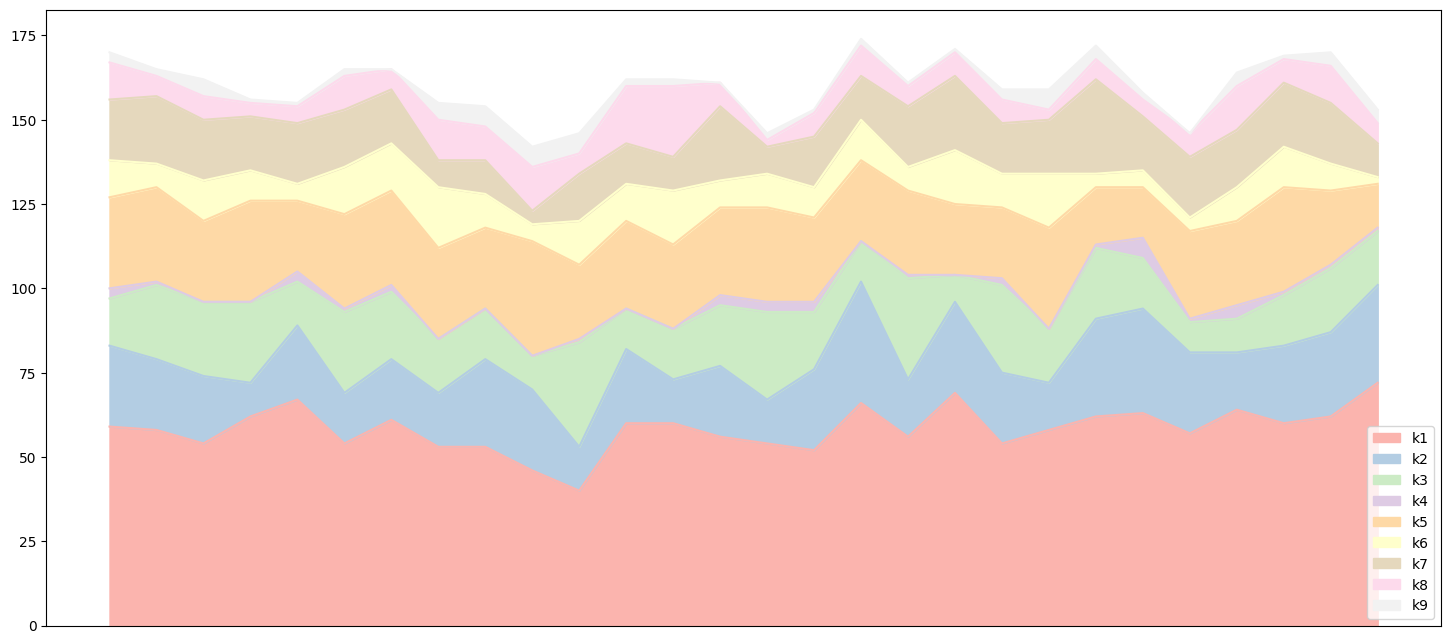

In [ ]:
group = 200
bins = pd.cut(df.index, int(len(df)/group))
k1 = df[(df["tag"].str.contains("k1"))]
k2 = df[(df["tag"].str.contains("k2"))]
k3 = df[(df["tag"].str.contains("k3"))]
k4 = df[(df["tag"].str.contains("k4"))]
k5 = df[(df["tag"].str.contains("k5"))]
k6 = df[(df["tag"].str.contains("k6"))]
k7 = df[(df["tag"].str.contains("k7"))]
k8 = df[(df["tag"].str.contains("k8"))]
k9 = df[(df["tag"].str.contains("k9"))]
vis = pd.DataFrame({'lemma':df['lemma'],
                    'k1':[1 if i in k1.index else 0 for i in range(len(df))],
                    'k2':[1 if i in k2.index else 0 for i in range(len(df))],
                    'k3':[1 if i in k3.index else 0 for i in range(len(df))],
                    'k4':[1 if i in k4.index else 0 for i in range(len(df))],
                    'k5':[1 if i in k5.index else 0 for i in range(len(df))],
                    'k6':[1 if i in k6.index else 0 for i in range(len(df))],
                    'k7':[1 if i in k7.index else 0 for i in range(len(df))],
                    'k8':[1 if i in k8.index else 0 for i in range(len(df))],
                    'k9':[1 if i in k9.index else 0 for i in range(len(df))]})
vis = vis.groupby(bins).agg(['sum'])
vis.columns = vis.columns.get_level_values(0)
vis
vis.plot.area(figsize=(18,8),xticks=([]),cmap='Pastel1')

In [ ]:
vis = pd.DataFrame({'length': [len(df.iloc[i]['word']) for i in range(len(df))]})
vis

length
0          1
1          3
2          6
3          5
4          1
5          5
6          3
7          1
8          7
9          3
10         1
11         3
12         5
13         3
14         1
15         9
16         4
17         2
18         5
19         4
20         1
21         3
22         6
23         7
24         3
25         1
26         1
27         5
28         6
29         5
30         4
31         1
32         8
33         5
34         4
35         5
36         3
37         1
38         4
39         5
40         6
41         4
42         3
43         1
44         6
45         5
46         5
47         6
48         1
49         6
50         6
51         1
52         7
53         8
54         7
55         5
56         5
57         3
58         1
59         4
60         2
61         7
62         3
63         1
64         3
65         1
66         1
67         6
68         5
69         5
70         6
71         8
72        11
73         5
74         1
75         8
76         3
77         2
78         4
79         5
80         1
81         1
82         5
83         4
84         1
85         6
86         7
87         2
88         2
89         5
90         5
91         5
92         6
93         1
94         2
95         2
96         1
97         7
98         1
99         4
100        6
101        8
102        2
103        1
104        6
105        8
106        1
107        8
108        2
109        7
110        5
111        1
112        6
113        4
114        6
115        4
116        1
117        3
118        5
119        5
120        1
121        5
122        5
123        1
124        3
125        7
126        7
127        5
128        1
129        2
130        7
131        9
132        3
133        1
134        2
135        6
136        6
137        3
138        5
139        1
140        4
141        1
142        4
143        6
144        5
145        1
146        3
147        7
148        5
149        5
150        4
151        1
152        4
153        1
154        4
155        3
156        4
157        4
158        1
159        4
160        1
161        3
162        1
163        6
164        2
165        3
166        1
167        3
168        2
169        6
170        1
171        8
172        4
173        1
174        2
175        7
176        5
177        1
178        5
179        7
180        1
181        1
182        4
183        2
184        6
185        1
186        7
187        5
188        1
189        1
190        7
191        5
192        4
193        3
194        1
195        3
196        5
197        1
198        4
199        1
200        1
201        5
202        3
203        2
204        5
205        1
206        4
207        2
208        5
209        7
210        6
211        1
212        3
213        5
214        1
215        1
216        3
217        5
218        1
219        6
220        5
221        4
222        1
223        2
224        8
225        6
226        3
227        5
228        6
229        4
230        4
231        1
232        2
233        5
234        1
235        5
236        6
237        6
238        4
239        6
240        5
241        1
242        2
243        2
244        2
245        5
246        1
247        6
248        4
249        1
250        4
251        6
252        7
253        1
254        4
255        8
256        8
257        1
258        2
259        1
260        5
261        1
262        5
263        5
264        6
265        1
266        2
267        8
268        7
269        7
270        5
271        4
272        5
273        1
274        2
275        8
276        7
277        3
278        4
279        6
280        5
281        6
282        1
283        7
284        6
285        1
286        5
287        5
288        1
289        2
290        7
291        2
292        4
293        6
294        1
295        1
296        9
297        6
298        5
299        5
300        1
301        6
302        4
303        2
304        6
305        5
306        1
30

<Axes: >

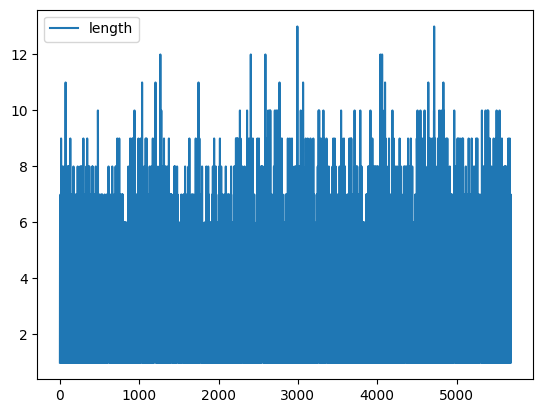

In [ ]:
vis.plot()

<Axes: >

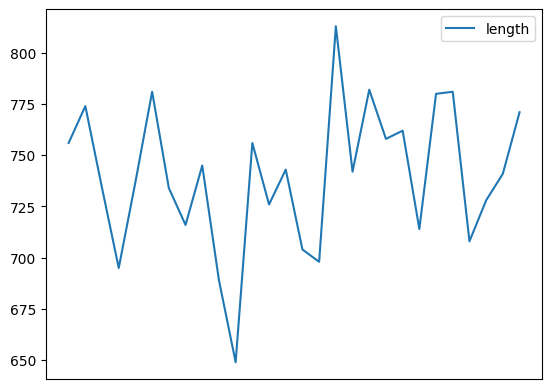

In [ ]:
group = 200
bins = pd.cut(df.index, int(len(df)/group))
vis = pd.DataFrame({'length': [len(df.iloc[i]['lemma']) for i in range(len(df))]})
vis = vis.groupby(bins).agg(['sum'])
vis.columns = vis.columns.get_level_values(0)
vis
vis.plot(xticks=([]))

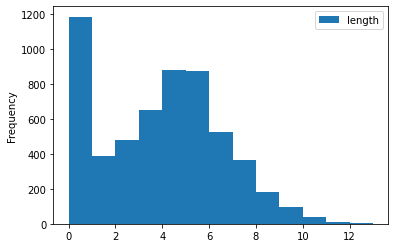

In [ ]:
vis = pd.DataFrame({'word':df.word, 'length': [len(df.iloc[i]['word']) if df.iloc[i]['pos']!='k?' and df.iloc[i]['pos']!='kI' else 0 for i in range(len(df))]})
vis.plot.hist(bins=13)

In [ ]:
count, division = np.histogram(vis.length, bins=13)
count, division

(array([1186,  390,  478,  654,  880,  874,  528,  364,  180,   96,   38,
           9,    7]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13.]))

In [ ]:
vis[vis.length==13]

word  length
2993  truchloroušky      13
4717  rozesmutnivši      13

In [ ]:
df.iloc[4717]

word     rozesmutnivši
lemma      rozesmutnit
tag       k5eAaPmDgFnS
pos                 k5
Name: 4717, dtype: object

In [ ]:
df.iloc[2993].tag

'k1gFnPc4'